## Exploring Channel (Media-Mix) Performance Data

In [453]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('channel_cost_clean4.csv', skipinitialspace=True,
                   low_memory=False)

Convert 'Date' to 'Week','Month', and 'Year'

In [454]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data['Year'] = data.index.year
data['Month'] = data.index.month
data['Week'] = data.index.week

In [455]:
print data.head()

            FTAdWords  FTBing  FTEmail  FTEvent  FTFacebook  FTInfluencer  \
Date                                                                        
2016-04-24        NaN     NaN       71      NaN         271             3   
2016-05-01        NaN     NaN        7      NaN         912             3   
2016-05-08        NaN     NaN       21      0.0        1621            19   
2016-05-15        NaN     NaN        9      0.0        3398            17   
2016-05-22        NaN     NaN       26      0.0        2306            54   

            FTInstagram  FTOrganic  FTPartner  FTSnapchat  ...   TwitterConv  \
Date                                                       ...                 
2016-04-24           59      11121        NaN         NaN  ...          1.00   
2016-05-01          291       3311        NaN       157.0  ...          0.40   
2016-05-08         1097       3434        NaN       146.0  ...          0.72   
2016-05-15         1536       3678        NaN       148.0  .

In [456]:
data.count()

FTAdWords          55
FTBing             43
FTEmail            61
FTEvent            59
FTFacebook         61
FTInfluencer       61
FTInstagram        61
FTOrganic          61
FTPartner          32
FTSnapchat         60
FTTwitter          29
FTYouTube          53
PSAdWords          54
PSBing             19
PSEmail            60
PSEvent            25
PSFacebook         61
PSInfluencer       61
PSInstagram        61
PSOrganic          61
PSPartner           6
PSSnapchat         59
PSTwitter           4
PSYouTube          52
AdWordsSpend       36
BingSpend          13
EmailSpend          0
EventSpend          0
FacebookSpend      46
InfluencerSpend     0
InstagramSpend     46
OrganicSpend        0
PartnerSpend        0
SnapchatSpend      46
TwitterSpend        3
YouTubeSpend       40
AdWordsConv        61
BingConv           61
EmailConv          61
EvenConv           61
FacebookConv       61
InfluencerConv     61
InstagramConv      61
OrganicConv        61
PartnerConv        61
SnapchatCo

In [457]:
data.describe()

,FTAdWords,FTBing,FTEmail,FTEvent,FTFacebook,FTInfluencer,FTInstagram,FTOrganic,FTPartner,FTSnapchat,...,TwitterConv,YouTubeConv,CatAdWords,CatFacebook,CatInstagram,CatSnapchat,CatYouTube,Year,Month,Week
count,55.000000,43.000000,61.000000,59.000000,61.000000,61.000000,61.000000,61.000000,32.000000,60.000000,...,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,219.418182,6.372093,10.459016,1.372881,1276.754098,536.032787,934.065574,4149.327869,1.906250,826.350000,...,0.034754,0.324262,0.131148,0.229508,0.229508,0.180328,0.131148,2016.409836,6.245902,25.540984
std,163.089125,9.198921,11.420119,2.007729,1109.724420,511.784198,1720.611847,1722.882630,8.818453,1235.112783,...,0.163540,0.199628,0.340363,0.424006,0.424006,0.387651,0.340363,0.495885,3.254001,14.199265
min,2.000000,0.000000,1.000000,0.000000,74.000000,3.000000,3.000000,1595.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,1.000000,1.000000
25%,78.000000,0.000000,3.000000,0.000000,232.000000,179.000000,36.000000,3266.000000,0.000000,16.500000,...,0.000000,0.230000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,4.000000,16.000000
50%,203.000000,0.000000,7.000000,1.000000,1231.000000,326.000000,490.000000,3678.000000,0.000000,152.500000,...,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,6.000000,23.000000
75%,352.000000,12.500000,12.000000,2.000000,1958.000000,820.000000,1043.000000,4808.000000,0.000000,1250.750000,...,0.000000,0.460000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,9.000000,37.000000
max,659.000000,28.000000,71.000000,12.000000,5052.000000,2191.000000,10978.000000,11121.000000,50.000000,5155.000000,...,1.000000,0.680000,1.000000,1.000000,1.000000,1.000000,1.000000,2017.000000,12.000000,52.000000


## Channel: AdWords

In [458]:
# Create AdWords data frame. Exclude outliers and drop null.
adwords_data = data.ix[:, ['FTAdWords', 'PSAdWords','AdWordsSpend','AdWordsConv','CatAdWords','FTOrganic', 'PSOrganic','Week']]

adwords_data= adwords_data.loc[adwords_data.FTAdWords < 1200]
adwords_data= adwords_data.loc[adwords_data.FTOrganic < 6000]

adwords_data.dropna()
adwords_nonnull=adwords_data.dropna()
adwords_nonnull.describe()
print (adwords_nonnull.describe())


        FTAdWords   PSAdWords  AdWordsSpend  AdWordsConv  CatAdWords  \
count   28.000000   28.000000     28.000000    28.000000   28.000000   
mean   274.428571  171.392857  16696.821429     0.633929    0.214286   
std    143.553430   89.477636  12449.072689     0.125354    0.417855   
min     44.000000   39.000000   1563.000000     0.340000    0.000000   
25%    179.000000  100.250000   3495.750000     0.607500    0.000000   
50%    248.500000  157.500000  13074.500000     0.650000    0.000000   
75%    379.500000  243.500000  27134.500000     0.672500    0.000000   
max    659.000000  345.000000  40701.000000     0.900000    1.000000   

         FTOrganic    PSOrganic       Week  
count    28.000000    28.000000  28.000000  
mean   3594.214286  1731.464286  32.107143  
std    1175.725508   535.660927   8.659567  
min    1595.000000   793.000000  17.000000  
25%    2691.500000  1421.500000  23.750000  
50%    3438.000000  1742.000000  32.500000  
75%    4516.750000  1975.000000  39.

In [469]:
#Looking At AdWords Spend Effects Pay Subs
import statsmodels.formula.api as smf
lm_adwords = smf.ols(formula='PSAdWords ~ AdWordsSpend', data=adwords_nonnull).fit()
#print the full summary
lm_adwords.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PSAdWords   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     8.653
Date:                Mon, 10 Jul 2017   Prob (F-statistic):            0.00678
Time:                        09:06:11   Log-Likelihood:                -161.03
No. Observations:                  28   AIC:                             326.1
Df Residuals:                      26   BIC:                             328.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      111.4248     25.267      4.410      0.000        59.489   163.361
AdWordsSpend     0.0036      0.001      2.942      0.007         0.001     0.006
==============================================================================
Omnibus:                        4.741   Durbin-Watson:                   0.736
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                4.221
Skew:                           0.936   Prob(JB):                        0.121
Kurtosis:                       2.662   Cond. No.                     3.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [470]:
# Predict Pay Subs Given Different Spend Amount

X_new_psadwords = pd.DataFrame({'AdWordsSpend': [50000]})
X_new_psadwords.head()
lm_adwords.predict(X_new_psadwords)

array([ 291.00400066])

In [ ]:
'''from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    plt.figure()
    plt.hist(residuals, bins=np.ceil(np.sqrt(len(y))))
    # keep the model
    return algo

X = adwords_nonnull[['AdWordsSpend']]
y = adwords_nonnull['PSAdWords']
lm_adwords = linear_model.LinearRegression()
lm_adwords.fit = get_linear_model_metrics(X, y, lm)

#lm_adwords = linear_model.LinearRegression()
#lm_adwords.fit(your training data for adwords)'''

## Channel: Facebook

In [464]:
# Create Facebook data frame. Exclude outliers and drop null.
facebook_data = data.ix[:, ['FTFacebook', 'PSFacebook','FacebookSpend', 'FacebookConv','FTOrganic', 'PSOrganic','Week']]

facebook_data= facebook_data.loc[facebook_data.FTFacebook < 4000]
facebook_data= facebook_data.loc[facebook_data.FTOrganic < 6000]

facebook_data.dropna()
facebook_nonnull=facebook_data.dropna()
facebook_nonnull.describe()
print (facebook_nonnull.describe())


        FTFacebook   PSFacebook  FacebookSpend  FacebookConv    FTOrganic  \
count    40.000000    40.000000      40.000000     40.000000    40.000000   
mean   1538.450000   768.075000   81663.425000      0.509000  3699.600000   
std     796.267509   428.595344   44788.384173      0.137893  1173.655014   
min      91.000000    49.000000     843.000000      0.240000  1595.000000   
25%     979.500000   431.000000   57226.250000      0.430000  2800.750000   
50%    1603.000000   814.500000   87348.500000      0.495000  3570.000000   
75%    2124.000000  1036.500000  107996.500000      0.612500  4716.000000   
max    3398.000000  1774.000000  159965.000000      0.950000  5905.000000   

         PSOrganic       Week  
count    40.000000  40.000000  
mean   1879.850000  28.050000  
std     646.141191  10.803489  
min     793.000000  11.000000  
25%    1498.250000  19.750000  
50%    1810.500000  26.000000  
75%    2068.000000  37.250000  
max    3451.000000  47.000000  


In [467]:
#Looking At Facebook Spend Effects Pay Subs
import statsmodels.formula.api as smf
lm_facebook = smf.ols(formula='PSFacebook ~ FacebookSpend', data=facebook_nonnull).fit()
#print the full summary
lm_facebook.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PSFacebook   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     93.91
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           8.11e-12
Time:                        09:05:52   Log-Likelihood:                -273.78
No. Observations:                  40   AIC:                             551.6
Df Residuals:                      38   BIC:                             554.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept       108.7074     77.377      1.405      0.168       -47.935   265.350
FacebookSpend     0.0081      0.001      9.691      0.000         0.006     0.010
==============================================================================
Omnibus:                        1.324   Durbin-Watson:                   1.298
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.614
Skew:                           0.270   Prob(JB):                        0.736
Kurtosis:                       3.277   Cond. No.                     1.95e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [468]:
# Predict Free Trials Given Different Spend Amount
X_new_psfacebook = pd.DataFrame({'FacebookSpend': [50000]})
X_new_psfacebook.head()
lm_facebook.predict(X_new_psfacebook)

array([ 512.41786893])

## Channel: Instagram

In [471]:
# Create Instagram data frame. Exclude outliers and drop null.
instagram_data = data.ix[:, ['FTInstagram', 'PSInstagram', 'InstagramSpend','InstagramConv', 'FTOrganic', 'PSOrganic','Week']]

instagram_data= instagram_data.loc[instagram_data.FTInstagram < 2000]
instagram_data= instagram_data.loc[instagram_data.FTOrganic < 6000]

instagram_data.dropna()
instagram_nonnull=instagram_data.dropna()
instagram_nonnull.describe()
print (instagram_nonnull.describe())


       FTInstagram  PSInstagram  InstagramSpend  InstagramConv    FTOrganic  \
count    38.000000    38.000000       38.000000      38.000000    38.000000   
mean    758.578947   308.052632    48957.263158       0.416053  3643.184211   
std     480.333309   188.826525    32258.316097       0.070271  1166.200735   
min      10.000000     5.000000      395.000000       0.270000  1595.000000   
25%     361.250000   135.500000    23831.500000       0.380000  2738.250000   
50%     800.000000   311.000000    50495.000000       0.405000  3472.500000   
75%    1056.500000   428.250000    66042.500000       0.467500  4634.250000   
max    1802.000000   664.000000   126093.000000       0.540000  5905.000000   

         PSOrganic       Week  
count    38.000000  38.000000  
mean   1860.289474  28.026316  
std     653.267046  11.090504  
min     793.000000  11.000000  
25%    1456.750000  19.250000  
50%    1785.500000  24.000000  
75%    2062.750000  37.750000  
max    3451.000000  47.000000  


In [472]:
#Looking At Instagram Spend Effects Pay Subs
import statsmodels.formula.api as smf
lm_instagram = smf.ols(formula='PSInstagram ~ InstagramSpend', data=instagram_nonnull).fit()
#print the full summary
lm_instagram.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PSInstagram   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     145.9
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           3.18e-14
Time:                        09:06:38   Log-Likelihood:                -221.79
No. Observations:                  38   AIC:                             447.6
Df Residuals:                      36   BIC:                             450.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         51.3970     25.344      2.028      0.050        -0.004   102.798
InstagramSpend     0.0052      0.000     12.079      0.000         0.004     0.006
==============================================================================
Omnibus:                        8.358   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                7.105
Skew:                           0.907   Prob(JB):                       0.0286
Kurtosis:                       4.094   Cond. No.                     1.07e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [473]:
# Predict Free Trials Given Different Spend Amount
X_new_psinstagram = pd.DataFrame({'InstagramSpend': [50000]})
X_new_psinstagram.head()
lm_instagram.predict(X_new_psinstagram)

array([ 313.51911873])

## Channel: Snapchat

In [474]:
# Create Snapchat data frame. Exclude outliers and drop null.

snapchat_data = data.ix[:, ['FTSnapchat', 'PSSnapchat', 'SnapchatSpend', 'SnapchatConv', 'FTOrganic', 'PSOrganic','Week']]

snapchat_data= snapchat_data.loc[snapchat_data.FTSnapchat < 4000]
snapchat_data= snapchat_data.loc[snapchat_data.PSSnapchat < 1200]
snapchat_data= snapchat_data.loc[snapchat_data.FTOrganic < 6000]


snapchat_data.dropna()
snapchat_nonnull=snapchat_data.dropna()
snapchat_nonnull.describe()
print (snapchat_nonnull.describe())


        FTSnapchat  PSSnapchat  SnapchatSpend  SnapchatConv    FTOrganic  \
count    36.000000   36.000000      36.000000     36.000000    36.000000   
mean    588.805556  219.444444   46155.972222      0.450833  3518.416667   
std     680.238270  240.449275   54210.843039      0.194207  1087.796866   
min       4.000000    3.000000       0.000000      0.270000  1595.000000   
25%      66.500000   23.000000       0.000000      0.365000  2691.500000   
50%     235.000000   95.000000   24995.000000      0.400000  3399.500000   
75%     976.750000  373.000000   79705.000000      0.440000  4230.000000   
max    2171.000000  749.000000  171361.000000      1.130000  5905.000000   

         PSOrganic       Week  
count    36.000000  36.000000  
mean   1796.444444  29.166667  
std     525.990518  10.761041  
min     793.000000  11.000000  
25%    1498.250000  20.750000  
50%    1785.500000  29.500000  
75%    2062.000000  38.250000  
max    3352.000000  47.000000  


In [476]:
#Looking At Snapchat Spend Effects Pay Subs
import statsmodels.formula.api as smf
lm_snapchat = smf.ols(formula='PSSnapchat ~ SnapchatSpend', data=snapchat_nonnull).fit()
#print the full summary
lm_snapchat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PSSnapchat   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     11.21
Date:                Mon, 10 Jul 2017   Prob (F-statistic):            0.00200
Time:                        09:07:08   Log-Likelihood:                -242.81
No. Observations:                  36   AIC:                             489.6
Df Residuals:                      34   BIC:                             492.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept       117.4919     46.585      2.522      0.017        22.819   212.164
SnapchatSpend     0.0022      0.001      3.349      0.002         0.001     0.004
==============================================================================
Omnibus:                        9.488   Durbin-Watson:                   0.542
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                8.452
Skew:                           1.122   Prob(JB):                       0.0146
Kurtosis:                       3.774   Cond. No.                     9.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [477]:
# Predict Pay Subs Given Different Spend Amount
X_new_pssnapchat = pd.DataFrame({'SnapchatSpend': [50000]})
X_new_pssnapchat.head()
lm_snapchat.predict(X_new_pssnapchat)

array([ 227.93540229])

## Channel: YouTube

In [482]:
# Create YouTube data frame. Exclude outliers and drop null.

youtube_data = data.ix[:, ['FTYouTube', 'PSYouTube', 'YouTubeSpend', 'FTOrganic', 'PSOrganic','Week']]
youtube_data= youtube_data.loc[youtube_data.FTYouTube < 250]
youtube_data= youtube_data.loc[youtube_data.PSYouTube < 200]
youtube_data= youtube_data.loc[youtube_data.PSOrganic < 6000]

youtube_data.dropna()
youtube_nonnull=youtube_data.dropna()
youtube_nonnull.describe()
print (youtube_nonnull.describe())



        FTYouTube  PSYouTube  YouTubeSpend    FTOrganic    PSOrganic  \
count   25.000000  25.000000     25.000000    25.000000    25.000000   
mean   102.080000  44.600000   5671.560000  3261.560000  1793.360000   
std     59.165671  25.552234   3563.448378  1008.492732   553.969229   
min      0.000000   1.000000    727.000000  1595.000000   793.000000   
25%     60.000000  29.000000   2984.000000  2589.000000  1436.000000   
50%    105.000000  46.000000   4438.000000  3257.000000  1815.000000   
75%    134.000000  58.000000   8465.000000  3641.000000  2063.000000   
max    239.000000  99.000000  12905.000000  5523.000000  3198.000000   

            Week  
count  25.000000  
mean   37.880000  
std     8.973665  
min    17.000000  
25%    32.000000  
50%    38.000000  
75%    45.000000  
max    51.000000  


In [483]:
#Looking At YouTube Spend Effects Free Trial
import statsmodels.formula.api as smf
lm_youtube = smf.ols(formula='PSYouTube ~ YouTubeSpend', data=youtube_nonnull).fit()
#print the full summary
lm_youtube.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PSYouTube   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     15.81
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           0.000597
Time:                        09:09:07   Log-Likelihood:                -109.44
No. Observations:                  25   AIC:                             222.9
Df Residuals:                      23   BIC:                             225.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       18.6422      7.666      2.432      0.023         2.784    34.500
YouTubeSpend     0.0046      0.001      3.976      0.001         0.002     0.007
==============================================================================
Omnibus:                        0.749   Durbin-Watson:                   1.315
Prob(Omnibus):                  0.687   Jarque-Bera (JB):                0.214
Skew:                           0.221   Prob(JB):                        0.898
Kurtosis:                       3.102   Cond. No.                     1.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [484]:
# Predict Pay Subs Given Different Spend Amount
X_new_psyoutube = pd.DataFrame({'YouTubeSpend': [50000]})
X_new_psyoutube.head()
lm_youtube.predict(X_new_psyoutube)

array([ 247.48423617])

## Media Mix

In [503]:
#X_new_psadwords = pd.DataFrame({'AdWordsSpend': [50000]})
#X_new_psadwords.head()
#lm_adwords.predict(X_new_psadwords)


def ps_total_prediction(input_spend, lm_adwords, lm_facebook, lm_snapchat, lm_instagram, lm_youtube):
    X_new_adwords = pd.DataFrame({'AdWordsSpend': [input_spend[0]]})
    ps_adwords = lm_adwords.predict(X_new_adwords)
    X_new_facebook = pd.DataFrame({'FacebookSpend': [input_spend[1]]})
    ps_facebook = lm_facebook.predict(X_new_facebook)
    X_new_snapchat = pd.DataFrame({'SnapchatSpend': [input_spend[2]]})
    ps_snapchat = lm_snapchat.predict(X_new_snapchat)
    X_new_snapchat = pd.DataFrame({'InstagramSpend': [input_spend[3]]})
    ps_instagram = lm_instagram.predict(X_new_snapchat)
    X_new_instagram = pd.DataFrame({'YouTubeSpend': [input_spend[4]]})
    ps_youtube = lm_youtube.predict(X_new_instagram)
    
    ps_total = ps_adwords + ps_facebook + ps_snapchat + ps_instagram + ps_youtube
    return ps_total[0]

# order is adwords, facebook, snapchat, instagram, youtube
input_spend_1 = (10000, 200000, 300000, 10000, 30000)
ps_total = ps_total_prediction(input_spend_1, lm_adwords, lm_facebook, lm_snapchat, lm_instagram, lm_youtube)
print ps_total

input_spend_2 = (5000, 20000, 350000, 20000, 20000)
ps_total = ps_total_prediction(input_spend_2, lm_adwords, lm_facebook, lm_snapchat, lm_instagram, lm_youtube)
print ps_total

input_spend_3 = (5000, 25000, 350000, 20000, 15000)
ps_total = ps_total_prediction(input_spend_3, lm_adwords, lm_facebook, lm_snapchat, lm_instagram, lm_youtube)
print ps_total

input_spend_4 = (5000, 10000, 400000, 15000, 30000)
ps_total = ps_total_prediction(input_spend_4, lm_adwords, lm_facebook, lm_snapchat, lm_instagram, lm_youtube)
print ps_total

input_spend_5 = (3000, 22000, 250000, 15000, 35000)
ps_total = ps_total_prediction(input_spend_5, lm_adwords, lm_facebook, lm_snapchat, lm_instagram, lm_youtube)
print ps_total

2910.81175186
1556.59560818
1574.08244969
1605.85321905
1387.1142665


## All Channels

                FTAdWords  PSAdWords  AdWordsSpend  FTFacebook  PSFacebook  \
FTAdWords        1.000000   0.978586      0.491911    0.401259    0.318441   
PSAdWords        0.978586   1.000000      0.481064    0.393969    0.315367   
AdWordsSpend     0.491911   0.481064      1.000000    0.088797    0.184539   
FTFacebook       0.401259   0.393969      0.088797    1.000000    0.940407   
PSFacebook       0.318441   0.315367      0.184539    0.940407    1.000000   
FacebookSpend    0.523011   0.566052      0.517413    0.727049    0.765493   
FTInstagram      0.350563   0.372192     -0.035464    0.768772    0.616404   
PSInstagram      0.360466   0.381805     -0.019217    0.793085    0.657216   
InstagramSpend   0.593166   0.666441      0.277419    0.718022    0.596227   
FTSnapchat      -0.144161  -0.161339     -0.492440    0.214367    0.191594   
PSSnapchat      -0.162221  -0.153127     -0.456397    0.232831    0.249914   
SnapchatSpend    0.283590   0.308866      0.277605    0.153507  

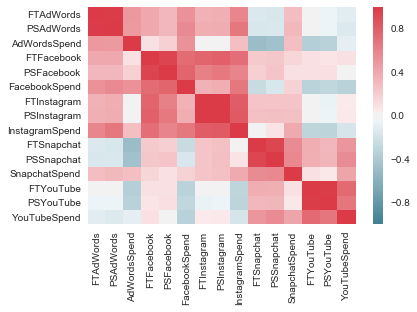

In [490]:
channel_data = data.ix[:, ['FTAdWords', 'PSAdWords','AdWordsSpend','FTFacebook', 'PSFacebook','FacebookSpend', 'FTInstagram', 'PSInstagram', 'InstagramSpend','FTSnapchat', 'PSSnapchat','SnapchatSpend','FTYouTube', 'PSYouTube','YouTubeSpend','Week']]

cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = channel_data[['FTAdWords', 'PSAdWords','AdWordsSpend','FTFacebook', 'PSFacebook', 'FacebookSpend','FTInstagram', 'PSInstagram', 'InstagramSpend','FTSnapchat', 'PSSnapchat','SnapchatSpend','FTYouTube', 'PSYouTube','YouTubeSpend']].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)